<a href="https://colab.research.google.com/github/NatalieGo/MFTI_hackathon_1/blob/main/hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install xgboost

Описание концепции продукта

Возможные области применения :

Обнаружение суицидальных мыслей : набор данных можно использовать для обучения моделей автоматическому обнаружению и пометке постов, содержащих потенциально суицидальный контент, что позволяет платформам предпринимать соответствующие действия.

Поддержка психического здоровья : выводы из этого набора данных можно использовать для разработки инструментов, которые предлагают ресурсы или вмешательства в области психического здоровья пользователям, проявляющим признаки стресса.

Исследование анализа настроений : исследователи могут анализировать лингвистические модели и настроения как несуицидальных, так и потенциально суицидальных твитов, чтобы получить представление о языке, используемом людьми в разных эмоциональных состояниях.

Осведомленность о проблемах общественного здравоохранения : набор данных можно использовать для повышения осведомленности о проблемах психического здоровья и важности ответственного использования социальных сетей.

Можно использовать в том числе для контекстной рекламы психологической помощи и линии доверия.

Датасет для обучения взят с kaggle.
Также, второй датасет у нас переведен с английского на русский. Первый датасет - изначально был на русском.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

In [ ]:
dataset_path = 'C:/Users/днс/Documents/jupyter/suicid97/171224/ru_suicide2_from_json.csv'

In [ ]:
df = pd.read_csv(dataset_path,sep=';')
display(df)
display(df.info())

,post,category
0,бывшая жена угрожает самоубийством недавно я н...,1
1,я странный на меня не влияют комплименты если ...,0
2,наконецто 2020 год почти закончился так что я ...,0
3,мне нужна помощь просто помоги мне я так плачу,1
4,я так растеряна здравствуйте меня зовут адам 1...,1
...,...,...
47986,я только что увидел забавный мем прежде чем по...,1
47987,я боюсь мне некому рассказать у меня инфекция ...,0
47988,педофилия членовредительство и мысли о самоуби...,1
47989,я больше не могу справляться почти 2 месяца на...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47991 entries, 0 to 47990
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   post      47991 non-null  object
 1   category  47991 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 750.0+ KB


None

**Модели машинного обучения**

Здесь решаем задачу классификации при работе с текстом.

Для решения задачи используем одну из 3 трех моделей, которая покажет лучший результат:
MultinomialNB, RandomForestClassifier, BaggingClassifier

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import nltk
nltk.download('punkt')

In [ ]:
# work_dataset_path = 'C:/Users/днс/Documents/jupyter/suicid97/ru_Suicide_new.csv'
# for dirname, _, filenames in os.walk('C:/Users/днс/Documents/jupyter/suicid97/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd
import re
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, roc_curve, auc)
from sklearn.metrics import confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix

import io
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47991 entries, 0 to 47990
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   post      47991 non-null  object
 1   category  47991 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 750.0+ KB


In [ ]:
X = df['post']
y = df['category']

In [ ]:
vectorizer = TfidfVectorizer(max_features = 50000)
X = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

repot_MultinomialNB = classification_report(y_test, y_pred)
print(repot_MultinomialNB)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      4818
           1       0.81      0.97      0.88      4781

    accuracy                           0.87      9599
   macro avg       0.89      0.87      0.87      9599
weighted avg       0.89      0.87      0.87      9599



Здесь precision - сколько предсказаний действительно относится к данному классу /  TP / (TP+FP)

Recall показывает, сколько предсказаний определённого класса верно. /  TP / (TP+FN)
Наиболее важная для нас, т.к. лучше получить больше ошибочно ложных, чем пропускать истинные случаи.

F1-score — это геометрическое среднее точности и полноты. / 2 (Precision recall) / (Precision + recall)

Support — фактическое количество примеров данного класса.

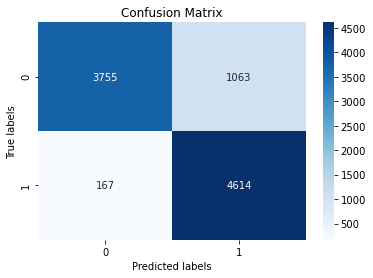

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

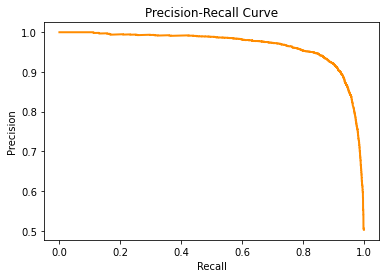

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Теперь попробуем то же самое с моделью RandomForestClassifier

In [ ]:
rf_n_model = RandomForestClassifier(n_estimators=30, random_state=22)

rf_n_model.fit(X_train, y_train)

y_pred = rf_n_model.predict(X_test)
repot_random_forest = classification_report(y_test, y_pred)
print(repot_random_forest)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4818
           1       0.89      0.84      0.87      4781

    accuracy                           0.87      9599
   macro avg       0.87      0.87      0.87      9599
weighted avg       0.87      0.87      0.87      9599



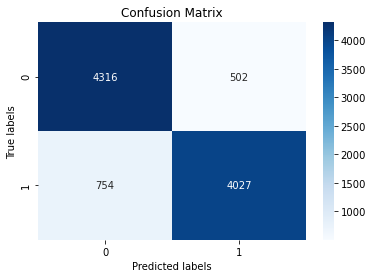

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

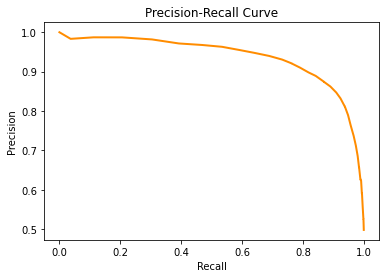

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, rf_n_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

А если попробовать оптимизировать случайный лес?

In [ ]:
# Создаем экземпляр классификатора
rf = RandomForestClassifier(random_state=42)

# Определяем пространство поиска гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced']
}

# Используем функцию recall_score в качестве метрики оценки
scoring = {'recall': make_scorer(recall_score)}
,

# Инициализируем объект GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='recall',
                           cv=5,
                           return_train_score=True)

# Выполняем поиск лучших параметров
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='recall', return_train_score=True,
             scoring={'recall': make_scorer(recall_score)})

In [ ]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший Recall:", grid_search.best_score_)

Лучшие параметры: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Лучший Recall: 0.883499582232114


In [ ]:
rf_n_model = RandomForestClassifier(n_estimators=200, random_state=22, class_weight='balanced',
                                    max_depth=None, max_features='auto', min_samples_leaf=1,
                                    min_samples_split=10)

rf_n_model.fit(X_train, y_train)

y_pred = rf_n_model.predict(X_test)
repot_random_forest = classification_report(y_test, y_pred)
print(repot_random_forest)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4818
           1       0.88      0.88      0.88      4781

    accuracy                           0.88      9599
   macro avg       0.88      0.88      0.88      9599
weighted avg       0.88      0.88      0.88      9599



В целом видим небольшое улучшение качества предсказаний модели, по сравнению с вариантом до оптимизации.

И попробуем третью модель

In [ ]:
bg=BaggingClassifier()
bg.fit(X_train, y_train)

y_pred = bg.predict(X_test)
report_bagging_classifier = classification_report(y_test, y_pred)
print(report_bagging_classifier)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4818
           1       0.89      0.85      0.87      4781

    accuracy                           0.87      9599
   macro avg       0.87      0.87      0.87      9599
weighted avg       0.87      0.87      0.87      9599



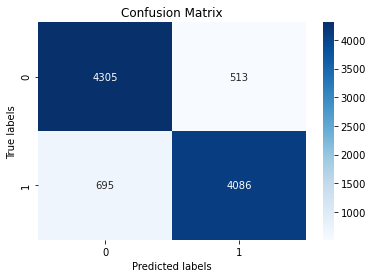

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

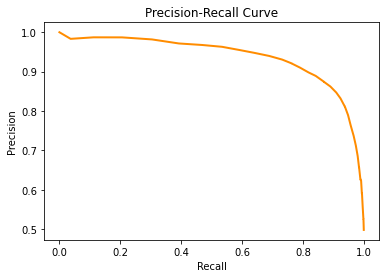

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, rf_n_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Итого, сравнив 3 модели получаем, что по recall по классу 1 выигрывает MultinomialNB с результатом 0.97.

In [ ]:
print('MultinomialNB')
print(repot_MultinomialNB)
print('RandomForestClassifier')
print(repot_random_forest)
print('BaggingClassifier')
print(report_bagging_classifier)

MultinomialNB
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      4818
           1       0.81      0.97      0.88      4781

    accuracy                           0.87      9599
   macro avg       0.89      0.87      0.87      9599
weighted avg       0.89      0.87      0.87      9599

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4818
           1       0.88      0.88      0.88      4781

    accuracy                           0.88      9599
   macro avg       0.88      0.88      0.88      9599
weighted avg       0.88      0.88      0.88      9599

BaggingClassifier
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4818
           1       0.89      0.85      0.87      4781

    accuracy                           0.87      9599
   macro avg       0.87      0.87      0.87      9599
weighted avg       

Теперь посмотреть результаты наших уже обученных моделей на втором датасете, русскоязычном

In [ ]:
file_path_2 = 'C:/Users/днс/Documents/jupyter/suicid97/171224/translated.csv'
data = pd.read_csv(file_path_2,sep=';')
# data['category'] = data['category'].astype('category').cat.codes
data.head()

,post,category
0,бывшая жена угрожает самоубийством недавно я н...,1
1,я странный на меня не влияют комплименты если ...,0
2,наконецто 2020 год почти закончился так что я ...,0
3,мне нужна помощь просто помоги мне я так плачу,1
4,я так растеряна здравствуйте меня зовут адам 1...,1


In [ ]:
x = data['post']
X = vectorizer.fit_transform(x)
y = data['category']
y_pred = clf.predict(X)
repot_MultinomialNB_2 = classification_report(y, y_pred)
print(repot_MultinomialNB_2)

              precision    recall  f1-score   support

           0       0.49      0.96      0.65     24076
           1       0.28      0.02      0.03     23914

    accuracy                           0.49     47990
   macro avg       0.39      0.49      0.34     47990
weighted avg       0.39      0.49      0.34     47990



In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Отсюда делаем вывод, что с переведенным текстом модель не справляется.

In [ ]:
val_dataset_path = 'C:/Users/днс/Documents/jupyter/suicid97/translated.csv'
df = pd.read_csv(val_dataset_path, sep=';')
